## Import Libraries & Load Dataset

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import   Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

## BrainTumor Dataset

Found 5712 files belonging to 4 classes.


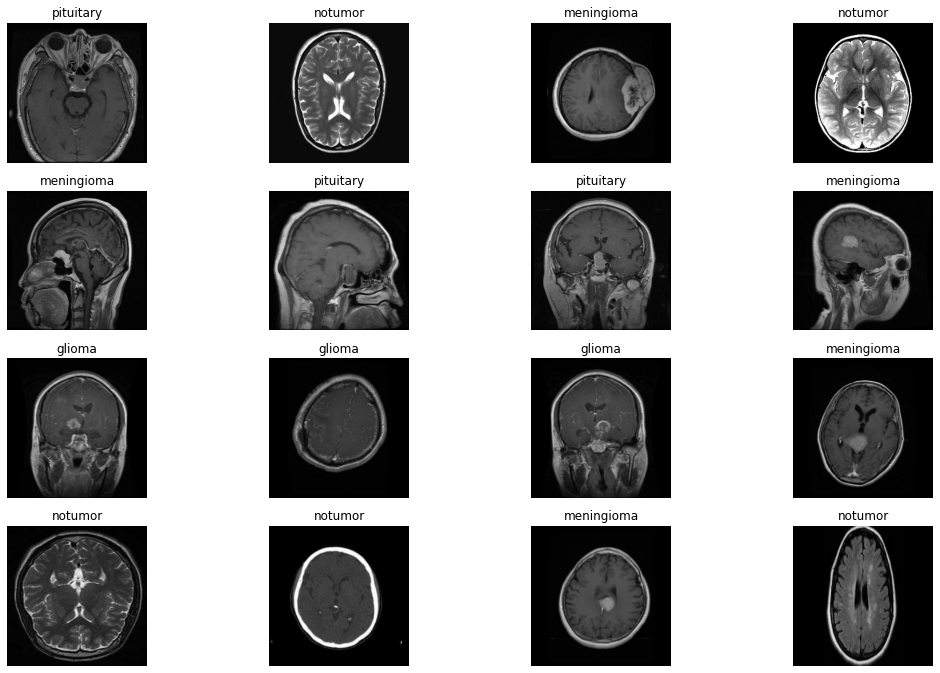

In [ ]:
pic = image_dataset_from_directory("/content/drive/MyDrive/Dataset/Brain Tumor MRI Dataset/Training",seed=7)
labels = pic.class_names
plt.figure(figsize=(18,18))
for img, label in pic.take(1):
  for i in range(16):
    ax = plt.subplot(6,4, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")

In [16]:
image_generator = ImageDataGenerator(
    rescale = 1.0 / 255.0,
    horizontal_flip = True
)
image_generator_test = ImageDataGenerator(
    rescale = 1.0 / 255.0)

In [17]:
path_train = "/content/drive/MyDrive/Dataset/Brain Tumor MRI Dataset/Training"
path_test = "/content/drive/MyDrive/Dataset/Brain Tumor MRI Dataset/Testing"
Train_images = image_generator.flow_from_directory(
    path_train,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299)
)
Test_images = image_generator_test.flow_from_directory(
    path_test,
    class_mode = "categorical",
    batch_size = 32,
    target_size = (299,299)
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Model
## Transfer Learning

## InceptionV3

In [18]:
base_model = InceptionV3(weights="imagenet",input_shape=(299,299,3),include_top=False)

In [19]:
base_model.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation="softmax"))

In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("BrainTumor.h5",monitor="val_accuracy",mode="max",save_best_only=True)

In [21]:
history = model.fit(Train_images,
                    epochs=20,
                    validation_data=Test_images,
                    callbacks=[checkpoint])

Epoch 1/20
179/179 [==============================] - 428s 2s/step - loss: 1.9614 - accuracy: 0.7269 - val_loss: 0.5934 - val_accuracy: 0.8146
Epoch 2/20
179/179 [==============================] - 65s 363ms/step - loss: 0.5130 - accuracy: 0.8213 - val_loss: 0.3852 - val_accuracy: 0.8391
Epoch 3/20
179/179 [==============================] - 66s 368ms/step - loss: 0.3737 - accuracy: 0.8631 - val_loss: 0.3507 - val_accuracy: 0.8780
Epoch 4/20
179/179 [==============================] - 66s 369ms/step - loss: 0.3216 - accuracy: 0.8918 - val_loss: 0.2602 - val_accuracy: 0.8955
Epoch 5/20
179/179 [==============================] - 66s 368ms/step - loss: 0.2443 - accuracy: 0.9172 - val_loss: 0.2260 - val_accuracy: 0.9176
Epoch 6/20
179/179 [==============================] - 66s 370ms/step - loss: 0.2446 - accuracy: 0.9172 - val_loss: 0.1825 - val_accuracy: 0.9397
Epoch 7/20
179/179 [==============================] - 64s 355ms/step - loss: 0.1872 - accuracy: 0.9368 - val_loss: 0.2531 - val_accu

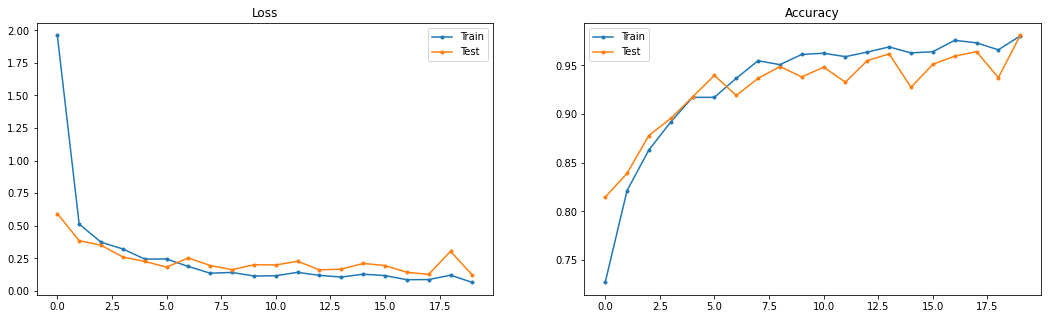

In [22]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(18,5))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()